# Movie Classification

## 1. Web Scrapping

ทำการ Scrape โดยเลือกประเภทหนังเป็น Feature Film ในประเทศอเมริกา ตั้งแต่ปี 2018 ถึง 2021

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
page_movie = []

for i in [2018, 2019, 2020, 2021]:
    for j in range(1, 4200, 100):
        url = "https://www.imdb.com/search/title/?title_type=feature&release_date="+str(i)+"-01-01,"+str(i)+"-12-31&countries=us&sort=alpha,asc&count=100&start="+str(j)+"&ref_=adv_nxt"
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')
        movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

        names = []
        years = []
        genres = []
        descriptions = []

        for container in movie_containers:

            if (container.find('span', attrs = {'class': 'genre'}) is not None) and ((container.find_all('p', attrs={'class':'text-muted'})[-1].text) != '\nAdd a Plot\n'):

                name = container.h3.a.text
                names.append(name)

                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                genre = container.find('span', attrs = {'class': 'genre'}).text
                genres.append(genre)

                description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
                descriptions.append(description)
        test_df = pd.DataFrame({'movie': names,
                           'year': years,
                           'genres': genres,
                           'descriptions': descriptions})
        page_movie.append(test_df)

In [3]:
page_movie[0]

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."
...,...,...,...,...
82,A Motion Selfie,(2018),"\nBiography, Comedy, Drama","\n""A Motion Selfie"" is one-of-a-kind DIY filmm..."
83,A Murder of Innocence,(2018),\nCrime,"\nBased on a true story, a community is rocked..."
84,A Natural Disaster,(2018),\nDrama,\n24 hours after an earthquake shakes Los Ange...
85,A Nice Quiet Life,(2018),"\nDrama, Romance",\nTwo college students fall in love one year b...


In [4]:
df = pd.concat(page_movie).reset_index(drop=True)
df

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."
...,...,...,...,...
12369,Zo in Exile,(2021),\nFantasy,\nZo and friends venture off for a weekend get...
12370,Zone Drifter,(2021),\nSci-Fi,"\nIn the distant future, a former soldier batt..."
12371,Zooey,(2021),"\nComedy, Drama, Sci-Fi","\nWhen a young boy, Noah, meets Zooey, a young..."
12372,Zwtral,(2021),\nMystery,\nMaking trades is his life. Justin finds hims...


## 2. Data Preparation

### year

In [5]:
df.year.unique()

array(['(2018)', '(I) (2018)', '', '(II) (2018)', '(III) (2018)',
       '(IV) (2018)', '(V) (2018)', '(IX) (2018)', '(XXIII)',
       '(VI) (2018)', '(VIII) (2018)', '(2019)', '(VII)',
       '(XVIII) (2018)', '(I)', '(II)', '(XVI) (2018)', '(II) (2019)',
       '(I) (2019)', '(IV) (2019)', '(V) (2019)', '(III) (2019)',
       '(VI) (2019)', '(VIII) (2019)', '(XXXV) (2019)', '(VII) (2019)',
       '(X) (2019)', '(IX) (2019)', '(XII) (2019)', '(2020)',
       '(III) (2020)', '(II) (2020)', '(I) (2020)', '(XXI) (2020)',
       '(V) (2020)', '(VI) (2020)', '(IV) (2020)', '(2021)',
       '(VIII) (2020)', '(XI) (2020)', '(I) (2021)', '(II) (2021)',
       '(IV) (2021)', '(XII) (2021)', '(III) (2021)', '(VI) (2021)',
       '(V) (2021)', '(VI)'], dtype=object)

In [6]:
df.year = df.year.str.extract('(\d+)')
df.year = df.year.ffill(axis = 0)
df.year.unique()

array(['2018', '2019', '2020', '2021'], dtype=object)

In [7]:
df.groupby(['year']).size().reset_index(name='count')

,year,count
0,2018,3359
1,2019,2907
2,2020,2929
3,2021,3179


In [8]:
df.genres = df.genres.str.strip()
df.head()

,movie,year,genres,descriptions
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi..."


In [96]:
#df.to_pickle('df.pickle')
df = pd.read_pickle('df.pickle')
df.head()

,movie,year,genres,descriptions
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi..."


In [89]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [4]:
all_genres = df.genres.tolist()
all_genres = ", ".join(all_genres)
all_genres = sorted(list(set(all_genres.split(", "))))
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [97]:
for g in all_genres:
  df[g] = df["genres"].apply(lambda x: 1 if len(set(x.split(", ")).intersection(set([g]))) > 0 else 0)

In [99]:
df.descriptions = df.descriptions.str.strip()
df.descriptions = df.descriptions.str.replace('...                See full summary\xa0»', '')
df.descriptions = df.descriptions.str.lower()
df.head()


<ipython-input-99-fa39b8d42ac5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.descriptions = df.descriptions.str.replace('...                See full summary\xa0»', '')


,movie,year,genres,descriptions,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,#1915House,2018,"Horror, Thriller",a century of secrets are hidden behind the fre...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,#SquadGoals,2018,"Drama, Thriller","samantha is a serious journalist, both for the...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,#Victoria,2018,"Action, Drama",victoria moves from out of town into the poor ...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1 Angry Black Man,2018,Drama,mike anderson is a senior at the quintessentia...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"a low budget but slick ""who done it"" involving...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
def stopword_removal(x, stpws=stopwords.words("english")):
  return list(set(x).difference(set(stpws)))

def lemmatization(x, stemmer=PorterStemmer()):
  return [stemmer.stem(i) for i in x]

def number_removal(x):
  return [i for i in x if not i.isnumeric()]

In [133]:
#df.descriptions = df.descriptions.str.replace('!', '').replace('#', '').replace('$', '').replace('#', '')


In [134]:
df["corpus"] = df["descriptions"].apply(lambda x: word_tokenize(x))
df["corpus"] = df["corpus"].apply(lambda x: stopword_removal(x))
df["corpus"] = df["corpus"].apply(lambda x: lemmatization(x))
df["corpus"] = df["corpus"].apply(lambda x: number_removal(x))
corpus_word = df["corpus"].tolist()
#[['hidden', 'back', 'see', 'paint', '.', 'late', 'secre


In [135]:
import itertools
check_word = corpus_word
words = list(set(itertools.chain.from_iterable(check_word)))
words.sort()
print(words)


['#', '$', '%', '&', "'", "''", "'09", "'27", "'60", "'65", "'70", "'80", "'90", "'93", "'99", "'action", "'actor", "'ali", "'arab", "'art", "'assassin", "'aswang", "'bad", "'beowulf", "'best", "'black", "'blue", "'bootcamp", "'boy", "'bring", "'bro", "'broken", "'call", "'camp", "'cann", "'captain", "'captiv", "'champa", "'chase", "'cheer", "'citizen", "'conspiraci", "'cottonwood", "'crime", "'d", "'day", "'daze", "'death", "'di", "'do", "'dog", "'doll", "'dumb", "'dumplin", "'eastern", "'el", "'em", "'emot", "'enchant", "'end", "'exclus", "'express", "'fail", "'fallen", "'farm", "'find", "'for", "'foxi", "'freedom", "'friend", "'get-rich-quick", "'ghost", "'grandma", "'greas", "'hasta", "'hood", "'hotel", "'hurt", "'if", "'in", "'journey", "'juic", "'katherin", "'kid", "'lame", "'lar", "'last", "'layer", "'leav", "'ll", "'lonesom", "'lost", "'love", "'loveiti", "'m", "'macbeth", "'mad", "'magic", "'make", "'man", "'mangrov", "'meatbal", "'micerz", "'monster", "'mort", "'multi-facet",

## Topic Modeling

* https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
* https://www.kaggle.com/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
* https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
* https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [12]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Create Dictionary
id2word = corpora.Dictionary(corpus_word)

# Create Corpus
texts = corpus_word

# Term Document Frequency
corpus2 = [id2word.doc2bow(text) for text in texts]

# View
print(corpus2[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]


In [13]:
id2word[0]


"'s"

In [14]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus2[:1]]


[[("'s", 1),
  (',', 1),
  ('.', 1),
  ('A', 1),
  ('addit', 1),
  ('back', 1),
  ('behind', 1),
  ('centuri', 1),
  ('escap', 1),
  ('fresh', 1),
  ('hidden', 1),
  ('late', 1),
  ('layer', 1),
  ('let', 1),
  ('might', 1),
  ('modern', 1),
  ('paint', 1),
  ('peel', 1),
  ('secret', 1),
  ('see', 1),
  ('someth', 1),
  ('till', 1)]]

In [41]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)


In [40]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus2]


[(0,
  '0.029*"``" + 0.028*"\'\'" + 0.026*"." + 0.021*"," + 0.010*"the" + '
  '0.008*"actor" + 0.008*"two" + 0.006*"\'s" + 0.006*"realli" + '
  '0.005*"comedi"'),
 (1,
  '0.044*"." + 0.033*"," + 0.010*"\'s" + 0.009*"angel" + 0.008*"day" + '
  '0.008*"lo" + 0.007*"find" + 0.005*"In" + 0.005*"the" + 0.005*"life"'),
 (2,
  '0.035*"?" + 0.021*"," + 0.018*"." + 0.013*"social" + 0.013*"what" + '
  '0.009*"will" + 0.009*"zombi" + 0.008*"target" + 0.007*"someth" + '
  '0.007*"media"'),
 (3,
  '0.035*"." + 0.025*"," + 0.017*"\'s" + 0.012*"christma" + 0.011*"the" + '
  '0.008*"It" + 0.008*"town" + 0.008*"holiday" + 0.007*"arriv" + '
  '0.007*"pandem"'),
 (4,
  '0.051*"." + 0.034*"," + 0.019*"A" + 0.017*"stori" + 0.014*"love" + '
  '0.012*"the" + 0.010*"film" + 0.009*"life" + 0.008*"world" + 0.007*"young"'),
 (5,
  '0.057*"." + 0.043*"," + 0.017*"A" + 0.017*"\'s" + 0.014*"friend" + '
  '0.012*"find" + 0.009*"famili" + 0.008*"home" + 0.008*"after" + '
  '0.008*"when"'),
 (6,
  '0.030*"." + 0.016*"

In [30]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=corpus_word, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.24854611852835212


In [36]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=corpus_word, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()


In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus2)
corpus_sets = [gensim.utils.ClippedCorpus(corpus2, int(num_of_docs*0.75)), corpus2]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                            id2word=id2word,
                                            num_topics=_______________________,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus2, id2word)
vis

C:\Users\SUNG\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # marginal distribution over terms (width of blue bars)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.440102  0.036617       1        1  32.197925
1      0.018822 -0.414896       2        1  13.164151
3      0.048295  0.155833       3        1  12.197621
8     -0.048364  0.035422       4        1   8.797459
5     -0.060362  0.033605       5        1   7.808728
7     -0.067778  0.036804       6        1   6.976068
9     -0.074845  0.030844       7        1   5.829040
2     -0.080166  0.030563       8        1   5.606749
0     -0.084399  0.029437       9        1   4.693858
6     -0.091305  0.025771      10        1   2.728400, topic_info=         Term          Freq         Total Category  logprob  loglift
2           .  12448.000000  12448.000000  Default  30.0000  30.0000
1           ,   8898.000000   8898.000000  Default  29.0000  29.0000
3           A   3759.000000   3759.000000  Default  28.0000  28.0000
0          's   2967.000000   2967.000000  Default  27.0000  27.0000
48        new    955.000000    955.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
959     civil     60.144642     61.056244  Topic10  -4.6648   3.5864
909    gather     58.725942     59.637582  Topic10  -4.6887   3.5861
1515  collect     53.995586     54.907250  Topic10  -4.7727   3.5847
1599    lover     50.279365     51.190877  Topic10  -4.8440   3.5835
2192  brought     49.690289     50.601981  Topic10  -4.8558   3.5833

[333 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1226      6  0.996353       '
72        7  0.999185      ''
1510     10  0.984666     're
0         1  0.999785      's
109       8  0.998319       (
...     ...       ...     ...
590       1  0.999192   world
1368      4  0.997098  writer
99        2  0.998840    year
55        7  0.996981    york
194       1  0.999239   young

[309 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 9, 6, 8, 10, 3, 1, 7])

## TFIDF Vetorization

In [85]:
df["corpus"] = df["corpus"].apply(lambda x: " ".join(x))
corpus = df["corpus"].tolist()

In [86]:
corpus

["till secret fresh see centuri modern escap behind late hidden addit someth layer paint , might . 's let peel back",
 "friend samantha journalist nate vy scholarship yearbook colleg full-rid gillian . rudi , 's paper school seriou local",
 'seek father justic citi goe york poor victoria drug new neighborhood journey answer inner , reveng town . dealer move',
 'particular senior eight quintessenti week colleg anderson away mike liber . , graduat day school frost new-england art',
 "greedi attorney list shadi involv famili includ suspect wealthi slick , `` businessman low '' long . done budget murder assort butler",
 'lissa year pregnant . life , mayb old revis',
 'friend go detox group struggl island problem . realiz , togeth face',
 'parallel shift artist intellig live ( man other version ) mysteri whim . three , scientist spi',
 "valdez detect younger compromis brother morri n.y.p.d panther black status.111 member jame parti ralphi . 's undercov hunt feder partner/lov",
 'must captai

In [11]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
X = tfidf.toarray()
y = df.iloc[:, 4:28].values


In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Classification without LDA

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [185]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)


C:\Users\SUNG\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: y should be a 1d array, got an array of shape (9899, 24) instead.

In [16]:
filename = 'rf_withoutLDA.sav'
pickle.dump(rf, open(filename, 'wb'))
rf = pickle.load(open(filename, 'rb'))

In [17]:
y_pred = rf.predict(X_test)

In [94]:
f1 = []
for i in range(X_test.shape[0]):
  f1.append(f1_score(y_test[i], y_pred[i]))
f1

In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
# print("10CV score:", cross_val_score(rf, X_train, y_train, cv=10))
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy score: 0.17696969696969697
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       291
           1       0.00      0.00      0.00       156
           2       0.40      0.02      0.04        94
           3       0.00      0.00      0.00        53
           4       0.85      0.07      0.14       603
           5       0.00      0.00      0.00       201
           6       0.61      0.64      0.62      1031
           7       0.75      0.03      0.06       104
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        35
          11       0.81      0.25      0.38       492
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00       132
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00  

C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LDA

### How to find the optimal number of topics for LDA?

### Modelling LDA 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_train_lda = lda.fit_transform(X_train)
X_test_lda = lda.transform(X_test)

In [131]:
X_train_lda.shape

(9899, 5)

In [28]:
sum = 0
for i in X_train_lda[0]:
  sum = sum+i
print(sum)


1.0


In [30]:
X_train_lda

array([[0.05424718, 0.79178814, 0.05086776, 0.05178877, 0.05130815],
       [0.81109309, 0.04763115, 0.04635754, 0.04822748, 0.04669074],
       [0.66458149, 0.0461937 , 0.19827261, 0.04633346, 0.04461873],
       ...,
       [0.04055205, 0.69737742, 0.18189832, 0.040196  , 0.03997621],
       [0.04301081, 0.04313345, 0.04174215, 0.8301272 , 0.04198639],
       [0.83679679, 0.0413633 , 0.04037391, 0.0408814 , 0.0405846 ]])

In [29]:
print("Description 0: ")
for i, topic in enumerate(X_train_lda[0]):
  print("Topic ", i, ": ", topic*100, "%")


Description 0: 
Topic  0 :  5.42471786031428 %
Topic  1 :  79.17881443676907 %
Topic  2 :  5.086775537772676 %
Topic  3 :  5.178877312531499 %
Topic  4 :  5.130814852612463 %


In [45]:
print('X_train_lda: ', X_train_lda.shape)

lda_components = lda.components_
terms = vectorizer.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:7]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ", top_terms_list)


X_train_lda:  (9899, 5)
Topic 0:  ['young', 'the', 'life', 'man', 'find', 'one', 'famili']
Topic 1:  ['find', 'young', 'life', 'friend', 'the', 'man', 'year']
Topic 2:  ['plot', 'unknown', 'wrap', 'film', 'perform', 'gambl', 'base']
Topic 3:  ['the', 'new', 'find', 'two', 'stori', 'life', 'famili']
Topic 4:  ['the', 'love', 'young', 'day', 'stori', 'film', 'meet']


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate a word cloud image for given topic


def draw_word_cloud(index):
  imp_words_topic = ""
  comp = lda.components_[index]
  vocab_comp = zip(terms, component)
  sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic = imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure(figsize=(5, 5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


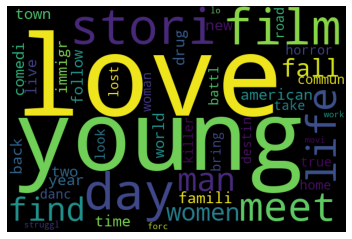

In [61]:
draw_word_cloud(4)


## Classification with LDA

In [22]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rf_lda = RandomForestClassifier(random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda = rf_lda.predict(X_test_lda)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred_lda)))
print(classification_report(y_test, y_pred_lda))


Accuracy score: 0.05292929292929293
              precision    recall  f1-score   support

           0       0.25      0.00      0.01       291
           1       0.00      0.00      0.00       156
           2       0.33      0.01      0.02        94
           3       0.00      0.00      0.00        53
           4       0.28      0.04      0.07       603
           5       0.00      0.00      0.00       201
           6       0.43      0.28      0.34      1031
           7       0.67      0.02      0.04       104
           8       0.50      0.01      0.02        97
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        35
          11       0.24      0.03      0.05       492
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        40
          14       0.33      0.01      0.01       132
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00  

C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
